# Chapter 4. Multilayer Perceptron


## Commonly Used Activation Functions

Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. They are differentiable operators to transform input signals to outputs, while most of them add non-linearity. Because activation functions are fundamental to deep learning, let us briefly survey some common activation functions.

In [ ]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

### Rectified Linear Unit
The most popular choice due to the simplicity of implementation.
ReLU provides simple nonlinear transformation. Given an element x, the function is defined as maximum of that element and 0.
$$
ReLU(x)=max(x,0)
$$
ReLU keepls only positive elements and discards all the negative elements by setting corresponding activations to 0.


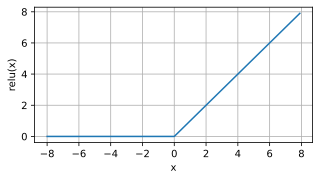

In [ ]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1), dtype=tf.float32)
y = tf.nn.relu(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'relu(x)', figsize=(5, 2.5))

When the input is negative, the derivative is zero, when positive - 1. When the input takes value 0, the ReLU function is not differentiable.


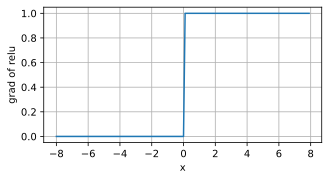

In [ ]:
with tf.GradientTape() as t:
    y = tf.nn.relu(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of relu',
         figsize=(5, 2.5))

The reason for using ReLU is that its derivatives are particularly well behaved: either they vanish or they just let the argument through. This makes optimization better behaved and it mitigated the well-documented problem of vanishing gradients that plagued previous versions of neural networks.
Note, exisrs several different types of the function, including parametrized ReLU function, allowing some information to get throughm even when the argument is negative.


### Sigmoid Function

The sigmoid function transforms its inputs, for which values lie in the domain R, to outputs that lie on the interval (0,1). 
The other name for sigmoid function is a "squashing function". It squashes any input in the range (-inf, inf)

$$
sigmoid(x)=\frac{1}{1+exp(-x)}
$$

In the earliest neural networks, scientists were interested in modeling biological neurons which either fire or do not fire. This is connected with the thresholding units. It takes activation value 0 when input is below some threshold and value 1 when the input exceeds the threshold.

When attention is shifted to the gradient based learning, the sigmoid function was a natural choice because it is a smooth differentiable approximation to a threshold unit.


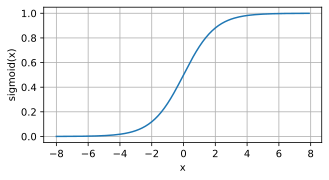

In [ ]:
y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

The derivative of the sigmoid function is given by the following equation:
$$
\frac{d}{dx}sigmoid(x)=\frac{exp(-x)}{(1+exp(-x))^{2}}=sigmoid(x)(1-sigmoid(x))
$$

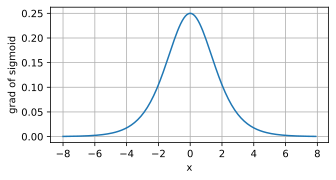

In [ ]:
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of sigmoid',
         figsize=(5, 2.5))

### Tanh Function

Like the sigmoid function, the tanh function (hyperbolic tangent) also squashes its inputs, transforming them into elements of the interval between -1 and 1.

$$
tanh(x)=\frac{1-exp(-2x)}{1+exp(-2x)}
$$

As the input nears 0, the tahn function approaches a linear transformation


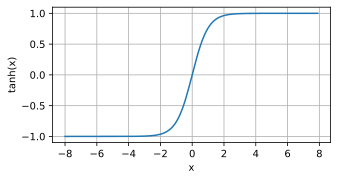

In [ ]:
y = tf.nn.tanh(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'tanh(x)', figsize=(5, 2.5))

The derivative of tahn function:

$$
\frac{d}{dx} tanh(x)=1-tanh^{2}(x)
$$

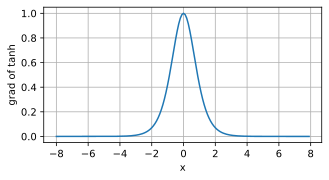

In [ ]:
with tf.GradientTape() as t:
    y = tf.nn.tanh(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of tanh',
         figsize=(5, 2.5))

## Implementation of Multilayer Perceptrons from Scratch

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

Fashion - MNIST contains 10 classes, each image consists of 784 grid of grayscale pixel.
10 classes. First, we implement model wuth 256 hidden units and one hidden layer.
Note, for every layer we keep track of one weight matrix and one bias vector.



In [ ]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = tf.Variable(tf.random.normal(
    shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
b1 = tf.Variable(tf.zeros(num_hiddens))
W2 = tf.Variable(tf.random.normal(
    shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))

params = [W1, b1, W2, b2]

**Activation Function:** use ReLU activation.

In [ ]:
def relu(X):
    return tf.math.maximum(X, 0)

**Model:** disregarding spatial structure, reshaping each two dimensional image into a flat vector




In [ ]:
def net(X):
    X = tf.reshape(X, (-1, num_inputs))
    H = relu(tf.matmul(X, W1) + b1)
    return tf.matmul(H, W2) + b2

**Loss function**

In [ ]:
def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(
        y, y_hat, from_logits=True)

**Training**: 10 epochs, learning rate = 0.1

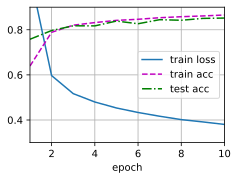

In [ ]:
num_epochs, lr = 10, 0.1
updater = d2l.Updater([W1, W2, b1, b2], lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

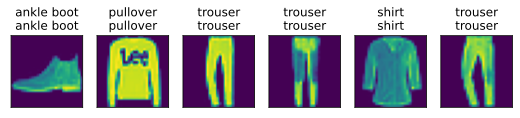

In [ ]:
d2l.predict_ch3(net,test_iter)

## Concise Implementation of Multilayer Perceptrons

Even more APIs can be implemented concisely by relying on the high-level API.
Now, twpp fully-connected layers are being added. The first is our hidden layer, which contains 256 hidden units and applies the ReLu activation function. The second one is the output layer.

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)])

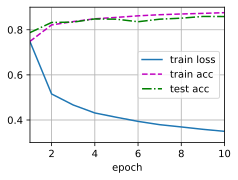

In [72]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### Polynomial Regression
Suppose, we use cubic polynomial to generate labels on this data set:
$$
y = 5 + 1.2x - 3.4 \frac{x^{2}}{2!}+5.6\frac{x^{3}}{3!} + \epsilon
$$

The noise term obeys normal distribution with mean of 0 and standard deviation of 0.1.



In [74]:
import math
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

In [75]:

max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [76]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [tf.constant(x, dtype=
    tf.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]


(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[-0.2964938 ],
        [ 0.13473931]], dtype=float32)>,
 <tf.Tensor: shape=(2, 20), dtype=float32, numpy=
 array([[ 1.0000000e+00, -2.9649380e-01,  4.3954287e-02, -4.3440578e-03,
          3.2199654e-04, -1.9093995e-05,  9.4354186e-07, -3.9964899e-08,
          1.4811681e-09, -4.8795239e-11,  1.4467485e-12, -3.8995635e-14,
          9.6349701e-16, -2.1974683e-17,  4.6538267e-19, -9.1988712e-21,
          1.7046301e-22, -2.9730132e-24,  4.8971111e-26, -7.6419109e-28],
        [ 1.0000000e+00,  1.3473931e-01,  9.0773404e-03,  4.0769152e-04,
          1.3733018e-05,  3.7007547e-07,  8.3106189e-09,  1.5996671e-10,
          2.6942255e-12,  4.0335343e-14,  5.4347561e-16,  6.6570478e-18,
          7.4747168e-20,  7.7472164e-22,  7.4561042e-24,  6.6975351e-26,
          5.6401330e-28,  4.4702798e-30,  3.3462357e-32,  2.3729973e-34]],
       dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.4518666, 5.102934 ], dtyp

In [77]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        l = loss(net(X), y)
        metric.add(tf.reduce_sum(l), d2l.size(l))
    return metric[0] / metric[1]

In [78]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = tf.losses.MeanSquaredError()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = tf.keras.Sequential()
    net.add(tf.keras.layers.Dense(1, use_bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    test_iter = d2l.load_array((test_features, test_labels), batch_size,
                               is_train=False)
    trainer = tf.keras.optimizers.SGD(learning_rate=.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net.get_weights()[0].T)

weight: [[ 4.9666286  1.4861552 -3.3262513  4.7273984]]


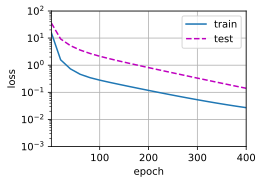

In [79]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

Let us take another look at linear function fitting. After the decline in early epochs, it becomes difficult to further decrease this model’s training loss. After the last epoch iteration has been completed, the training loss is still high. When used to fit nonlinear patterns (like the third-order polynomial function here) linear models are liable to underfit.

weight: [[3.8314583 2.7752998]]


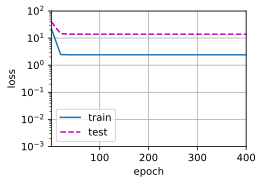

In [80]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

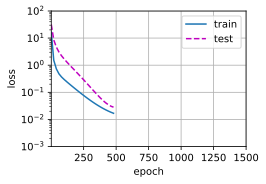

In [81]:
#High order polynomials will lead to overfitting
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

### High-Dimensional Linear Regression
Example of Weight Decay implementation, for details please check Notion.


In [1]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l


As before we generate some data:

$$
y = 0.05 + \sum^{d}_{i=1} 0.01 x_{i} + \epsilon \space \space \space where \space \space \space \epsilon ~ N(0,0.01^{2})
$$

We choose our label to be a linear function of out inputs, corrupted by Gaussian noise.
To make the effects of overfitting pronounced, we increase the dimensionality of the problem (d=200) and seize the training set to 20 examples.

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = tf.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

2022-07-14 17:12:19.776694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def init_params():
    w = tf.Variable(tf.random.normal(mean=1, shape=(num_inputs, 1)))
    b = tf.Variable(tf.zeros(shape=(1, )))
    return [w, b]

In [4]:
def l2_penalty(w):
    return tf.reduce_sum(tf.pow(w, 2)) / 2

In [5]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                # The L2 norm penalty term has been added, and broadcasting
                # makes `l2_penalty(w)` a vector whose length is `batch_size`
                l = loss(net(X), y) + lambd * l2_penalty(w)
            grads = tape.gradient(l, [w, b])
            d2l.sgd([w, b], grads, lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', tf.norm(w).numpy())

L2 norm of w: 18.47105


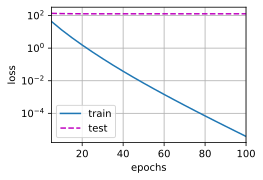

In [6]:
# Training without Regularization
train(lambd=0)

L2 norm of w: 0.024015706


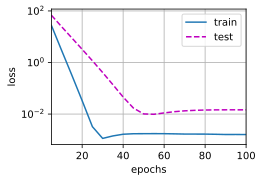

In [10]:
# Training with Regularization
train(lambd=8)

### Concise Implementation of Weight Decay


In [11]:
def train_concise(wd):

    net = tf.keras.models.Sequential()
    net.add(tf.keras.layers.Dense(
        1, kernel_regularizer=tf.keras.regularizers.l2(wd)))
    net.build(input_shape=(1, num_inputs))
    w, b = net.trainable_variables
    loss = tf.keras.losses.MeanSquaredError()
    num_epochs, lr = 100, 0.003
    trainer = tf.keras.optimizers.SGD(learning_rate=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                # `tf.keras` requires retrieving and adding the losses from
                # layers manually for custom training loop.
                l = loss(net(X), y) + net.losses
            grads = tape.gradient(l, net.trainable_variables)
            trainer.apply_gradients(zip(grads, net.trainable_variables))
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', tf.norm(net.get_weights()[0]).numpy())

    

L2 norm of w: 0.03133173


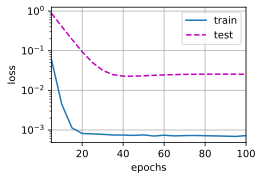

In [12]:
train_concise(3)

### Dropout Implementation from Scratch




In [13]:
import tensorflow as tf
from d2l import tensorflow as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return tf.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = tf.random.uniform(
        shape=tf.shape(X), minval=0, maxval=1) < 1 - dropout
    return tf.cast(mask, dtype=tf.float32) * X / (1.0 - dropout)

In [14]:
X = tf.reshape(tf.range(16, dtype=tf.float32), (2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))



tf.Tensor(
[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]], shape=(2, 8), dtype=float32)
tf.Tensor(
[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]], shape=(2, 8), dtype=float32)
tf.Tensor(
[[ 0.  2.  0.  6.  8.  0. 12.  0.]
 [ 0.  0. 20.  0. 24. 26.  0. 30.]], shape=(2, 8), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]], shape=(2, 8), dtype=float32)


In [15]:
#Defining Model Parameters
num_outputs, num_hiddens1, num_hiddens2 = 10, 256, 256

In [16]:
#Defining Model
dropout1, dropout2 = 0.2, 0.5

class Net(tf.keras.Model):
    def __init__(self, num_outputs, num_hiddens1, num_hiddens2):
        super().__init__()
        self.input_layer = tf.keras.layers.Flatten()
        self.hidden1 = tf.keras.layers.Dense(num_hiddens1, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(num_hiddens2, activation='relu')
        self.output_layer = tf.keras.layers.Dense(num_outputs)

    def call(self, inputs, training=None):
        x = self.input_layer(inputs)
        x = self.hidden1(x)
        if training:
            x = dropout_layer(x, dropout1)
        x = self.hidden2(x)
        if training:
            x = dropout_layer(x, dropout2)
        x = self.output_layer(x)
        return x

net = Net(num_outputs, num_hiddens1, num_hiddens2)

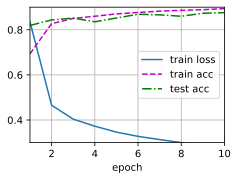

In [17]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

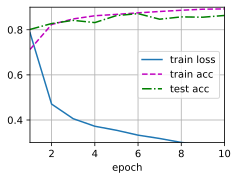

In [18]:
###Dropout : Conscise implementation
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    # Add a dropout layer after the first fully connected layer
    tf.keras.layers.Dropout(dropout1),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    # Add a dropout layer after the second fully connected layer
    tf.keras.layers.Dropout(dropout2),
    tf.keras.layers.Dense(10),
])

trainer = tf.keras.optimizers.SGD(learning_rate=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Numerical Stability
### Vanishing Gradients


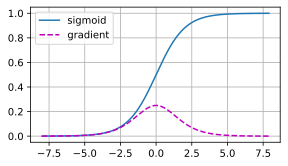

In [19]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

x = tf.Variable(tf.range(-8.0, 8.0, 0.1))
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), [y.numpy(), t.gradient(y, x).numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

As you can see, the sigmoid’s gradient vanishes both when its inputs are large and when they are small. Moreover, when backpropagating through many layers, unless we are in the Goldilocks zone, where the inputs to many of the sigmoids are close to zero, the gradients of the overall product may vanish. When our network boasts many layers, unless we are careful, the gradient will likely be cut off at some layer. Indeed, this problem used to plague deep network training. Consequently, ReLUs, which are more stable (but less neurally plausible), have emerged as the default choice for practitioners.

### Exploding Gradients
The opposite problem, when gradients explode, can be similarly vexing. To illustrate this a bit better, we draw 100 Gaussian random matrices and multiply them with some initial matrix. For the scale that we picked (the choice of the variance $\sigma^{2}=1$), the matrix product explodes. When this happens due to the initialization of a deep network, we have no chance of getting a gradient descent optimizer to converge.

In [20]:
M = tf.random.normal((4, 4))
print('a single matrix \n', M)
for i in range(100):
    M = tf.matmul(M, tf.random.normal((4, 4)))

print('after multiplying 100 matrices\n', M.numpy())

a single matrix 
 tf.Tensor(
[[ 1.2111771  -0.8404362   2.5685346   0.73575747]
 [-0.00949714  0.33265382 -0.714194   -0.5020302 ]
 [-0.23976213 -0.06314126  0.3732642  -1.0312893 ]
 [ 0.5547866   0.10176762 -1.2186899  -1.9489174 ]], shape=(4, 4), dtype=float32)
after multiplying 100 matrices
 [[ 1.0387993e+27 -1.3105873e+26 -4.6928764e+26 -5.0919758e+26]
 [-3.8651983e+26  4.8764780e+25  1.7461417e+26  1.8946404e+26]
 [ 8.3259143e+26 -1.0504299e+26 -3.7613144e+26 -4.0811886e+26]
 [-6.2801328e+26  7.9232695e+25  2.8371137e+26  3.0783901e+26]]


### Problem of Breaking Symmetry

Another problem in neural network design is the symmetry inherent in their parametrization. 

